# Understanding Features of an Image:

### Why finding features in an image is important?
<br>
What if the computer can stitch several natural images to one, what about giving a lot of pictures of a building or any structure and tell computer to create a 3D model out of it? It is same as completing a jigsaw puzzle out of several images. How does human go about it?<br/>
The answer is, we are looking for specific patterns or specific features which are unique, which can be easily tracked, which can be easily compared. If we go for a definition of such a feature, we may find it difficult to express it in words, but we know what are they. If some one asks you to point out one good feature which can be compared across several images, you can point out one. That is why, even small children can simply play these games. We search for these features in an image, we find them, we find the same features in other images, we align them. That’s it. (In jigsaw puzzle, we look more into continuity of different images). All these abilities are present in us inherently.
**Features** are mainly some specific patterns in different part of the image that can be used for modelling.<br/>

Consider a simple image(green part) below and the patches(red , blue , black) present on it:
![title](81.png)

Blue patch is flat area and difficult to find and track. Wherever you move the blue patch, it looks the same. For black patch, it is an edge. If you move it in vertical direction (i.e. along the gradient) it changes. Put along the edge (parallel to edge), it looks the same. And for red patch, it is a corner. Wherever you move the patch, it looks different, means it is unique. So basically, corners are considered to be good features in an image. (Not just corners, in some cases blobs are considered good features).

### Feature detection:
So now we answered our question, “what are these features?”. But next question arises. How do we find them? Or how do we find the corners?. That also we answered in an intuitive way, i.e., look for the regions in images which have maximum variation when moved (by a small amount) in all regions around it. This would be projected into computer language in coming chapters. So finding these image features is called **Feature Detection**.

### Feature Description:
So we found the features in image (Assume you did it). Once you found it, you should find the same in the other images. What we do? We take a region around the feature, we explain it in our own words, like “upper part is blue sky, lower part is building region, on that building there are some glasses etc” and you search for the same area in other images. Basically, you are describing the feature. Similar way, computer also should describe the region around the feature so that it can find it in other images. So called description is called **Feature Description**. Once you have the features and its description, you can find same features in all images and align them, stitch them or do whatever you want.

### Why is a corner so special?
Because, since it is the intersection of two edges, it represents a point in which the directions of these two edges change. Hence, the gradient of the image (in both directions) have a high variation, which can be used to detect it.


Our aim is to find little patches of image (or "windows") that generate a large variation when moved around. Have a look at this image:
![title](82.jpg)

The red square is the window we've chosen. Moving it around doesn't show much of variation. That is, the difference between the window, and the original image below it is very low. So you can't really tell if the window "belongs" to that position.

Of course, if you move the window too much, like onto the reddish region, you're bound to see a big difference. But we've moved the window too much. Not good.

Now have a look at this:
![title](83.jpg)

See? Even the little movement of the window produces a noticeable difference. This is the kind of window we're looking for. Here's how it translates mathematically:
![title](84.jpg)


1. E is the difference between the original and the moved window.
2. u is the window's displacement in the x direction
3. v is the window's displacement in the y direction
4. w(x, y) is the window at position (x, y). This acts like a mask. Ensuring that only the desired window is used.
5. I is the intensity of the image at a position (x, y)
6. I(x+u, y+v) is the intensity of the moved window
7. I(x, y) is the intensity of the original


We've looking for windows that produce a large E value. To do that, we need to high values of the terms inside the square brackets.

So, we maximize this term:
![title](85.jpg)

Then, we expand this term using the Taylor series. Whats that? It's just a way of rewriting this term in using its derivatives.(It will be using Sobel Operator(introduced in previous tutorials) to find deriavtives.)

![title](88.jpg)

See how the I(x+u, y+v) changed into a totally different form ( I(x,y)+uIx + vIy )? Thats the Taylor series in action. And because the Taylor series is infinite, we've ignored all terms after the first three. It gives a pretty good approximation. But it isn't the actual value.

Next, we expand the square. The I(x,y) cancels out, so its just two terms we need to square. It looks like this:
![title](86.jpg)

Now this messy equation can be tucked up into a neat little matrix form like this:
![title](87.jpg)

Now, we rename the summed-matrix, and put it to be M:
![title](89.jpg)

So the equation now becomes:
![title](90.jpg)


#### Then comes the main part. After this, they created a score R, basically an equation, which will determine if a window can contain a corner or not.
![title](91.jpg)

![title](92.png)


#### So the result of Harris Corner Detection is a grayscale image with these scores. Thresholding for a suitable give you the corners in the image. We will do it with a simple image.


OpenCV has the function **cv2.cornerHarris()** for this purpose. Its arguments are :

1. **img** - Input image, it should be grayscale and float32 type.
2. **blockSize** - It is the size of neighbourhood considered for corner detection (size of window)
3. **ksize** - Aperture parameter of Sobel derivative used.
4. **k** - Harris detector free parameter in the equation.

The Harris Corner Detector is just a mathematical way of determining which windows produce large variations when moved in any direction. With each window, a score R is associated. Based on this score, you can figure out which ones are corners and which ones are not.
<br/>
### Example: Performing corner detection on two images (first is more symmetric than the second)

In [ ]:
import cv2
import numpy as np
np.set_printoptions(threshold=np.nan)

img1 = cv2.imread("93.jpg")
img2 = cv2.imread("95.jpeg")
print("Image1 Matrix Shape-" , img1.shape) 
gray1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2GRAY)

gray1 = np.float32(gray1) #Harris corner detector takes up float values
gray2 = np.float32(gray2)
print("Gray1 Image Matrix Shape-" , gray1.shape) 
result1 = cv2.cornerHarris(gray1 , 2 , 3 , 0.04) #img , bloacksize , ksize , k
result2 = cv2.cornerHarris(gray2 , 2 , 3 , 0.04)
print("Reasulting(score) Image1 Matrix Shape-" , result1.shape)


# Threshold for an optimal value, it may vary depending on the image.
img1[result1 > 0.01*result1.max()] = [0 , 0 , 255] 
img2[result2 > 0.01*result2.max()] = [255 , 0 , 0] 

#The result matrix contains the score of each pixel being a corner or not.
#Most of the pixel have negative values, edges have small positive values or negative values 
#and corners have high positive values 
#Maximum value in the result matrix = 22283716.00
#We are filtering out those values of pixels in result matrix which are more than one percent of the maximum value
#assuming them to be corners and are putting red color value(0 , 0 255) on those pixels in the image matrix.
#We can experiment with threshold value.

while(True):
    cv2.imshow("img1" , img1)
    cv2.imshow("img2" , img2)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cv2.destroyAllWindows()
for i in range(5):
    cv2.waitKey(0)
    



## Original Image1
![title](93.jpg)
## Resulting Image1
![title](94.png)
## Original Image1
![title](95.jpeg)
## Resulting Image1 (when threshold is 1% of the max value of score)
![title](96.png)
## Resulting Image1 (when threshold is 0.1% of the max value of score)
![title](97.png)
## Resulting Image1 (when threshold is 0.01% of the max value of score)
### In this case it is detecting a few edges too as corners
![title](98.png)

# Shi-Tomasi Corner Detector & Good Features to Track

### Function = cv2.goodFeaturesToTrack()

in 1994, J. Shi and C. Tomasi made a small modification to it in their paper Good Features to Track which shows better results compared to Harris Corner Detector. The scoring function in Harris Corner Detector was given by:
![title](91.jpg)

Instead of this, Shi-Tomasi proposed:

![title](99.png)

OpenCV has a function, **cv2.goodFeaturesToTrack()**. It finds N strongest corners in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it). As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.

With all these informations, the function finds corners in the image. All corners below quality level are rejected. Then it sorts the remaining corners based on quality in the descending order. Then function takes first strongest corner, throws away all the nearby corners in the range of minimum distance and returns N strongest corners.

In below example, we will try to find 25 best corners:

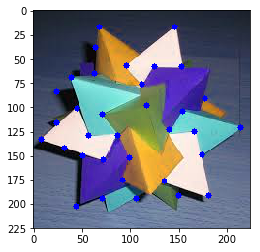

(<matplotlib.image.AxesImage at 0x11651c0f0>, None)

In [33]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

#Loading image , conveting it to gray and then converting to float
img = cv2.imread("95.jpeg")
gray = cv2.cvtColor( img , cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)


corners = cv2.goodFeaturesToTrack( gray , 40 , 0.01 , 20)
#print(corners.shape),(34 , 1, 2) 34 rows, 1 column each has two values of x, y values of a pixel, 34 corners are detected

for i in corners:
    x, y = i.ravel() #ravel transforms a multi-dimen matrix to 1-d
    #creating a circle on each corner detected
    cv2.circle( img , (x,y), 3 ,(0 , 0 , 255) , -1) #(img , center , int radius ,color(RGB) , thickness )

plt.imshow(img) , plt.show()

##### The result predicted almost 99% of the total corners present. Even teh corner of the shadow is detected.